In [1]:
import os
def create_folder_if_not_exists(folder_path):
    """
    Creates a folder if it does not exist.

    :param folder_path: Path of the folder to create
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")
        
def file_exists(file_path):
    """
    Checks if a file exists.

    :param file_path: Path of the file to check
    :return: True if the file exists, False otherwise
    """
    return os.path.isfile(file_path)

folder_path = 'synthetique_databases'
create_folder_if_not_exists(folder_path)

Folder 'synthetique_databases' already exists.


In [2]:
def repr(i):
    if type(i) == int:
        return str(i)
    else:
        return str(i[0])+"_"+str(i[1])

In [6]:
import math
nb_nodes = 1024
nb_graphs_er = 5
start = 3
nb_graphs_ba = 3
start_ba = 4
list_grid = [ ( int(math.sqrt(nb_nodes)),int(math.sqrt(nb_nodes))), (4,nb_nodes//4), (16,nb_nodes//16) ]

In [25]:
#generate ER graphs
import networkx as nx

list_er = [i for i in range(start, nb_graphs_er+start)]
for i in list_er:
    g = nx.fast_gnp_random_graph(nb_nodes, (math.log(nb_nodes)*i)/nb_nodes )
    file_path = folder_path + "/er_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [26]:
#generate BA graphs
list_ba = [i for i in range(start_ba, nb_graphs_ba+start_ba)]
for i in list_ba:
    g = nx.barabasi_albert_graph(nb_nodes, i)
    file_path = folder_path + "/ba_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [27]:
#generate grid graph
for i in list_grid:
    g = nx.grid_2d_graph(i[0],i[1])
    g = nx.convert_node_labels_to_integers(g)
    file_path = folder_path + "/gr_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    if not file_exists(file_path):
        nx.write_edgelist(g, file_path, data=False)

In [28]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
l += [ ("gr", e) for e in list_grid ]

In [29]:
#launch pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
j = 0
for x in l:
    i = x[1]
    print(i)
    file_path = folder_path + "/" + x[0] +"_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    #g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    for alg in algos:
        print("filepath : ",file_path)
        subprocess.run(["./main", file_path ,"u", alg, str(0), str(1), str(1), 'c']) 
    j += 1

3
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms.
38 operations.
end queries
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.003000 ms.
38 operations.
end queries
filepath :  synthetique_databases/er_1024_3.edges
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
***************

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms.
17 operations.
end queries
5
filepath :  synthetique_databases/ba_1024_5.edges
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.003000 ms.
19 operations.
end queries
filepath :  synthetique_databases/ba_1024_5.edges
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing.....
cur 0 ,cur 1 ,end writing after loop bfs
end preprocessing
preprocessing finished fine 
start queries
******************************
count operations not time
0.004000 ms

In [13]:
import random
def random_pairs(n, g, max_tries = 1000):
    V = g.nodes()
    res = []
    nb = 0
    tr = 0
    while nb <n and tr < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        if nx.has_path(g,pair[0],pair[1]):
            res.append(pair)
            nb += 1
        tr+=1
    if tr == max_tries:
        return -1
    return res

def random_pairs_exact(n, V):
    res = []
    for i in range(n):
        lV = list(V)
        pair = random.sample(lV, k = 2)
        res.append(pair)
    return res

def read_float_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return float(value)
    
    
def read_integer_from_file(file_path):
    """
    Reads a single float value from a file.

    :param file_path: Path to the file
    :return: The float value read from the file
    """
    with open(file_path, 'r') as file:
        value = file.readline().strip()
        print("val", value)
        return int(value)
    
import numpy as np

def calculate_mean_and_std(array):
    """
    Calculates the mean and standard deviation of an array.

    :param array: Input array
    :return: A tuple containing mean and standard deviation
    """
    mean = np.mean(array)
    std_dev = np.std(array)
    return mean, std_dev

In [31]:
def read_integers_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    integers = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            integers.append(int(line.strip()))
    return integers

def read_floats_from_file(file_path):
    """
    Reads a file containing one integer on each line into an array.

    :param file_path: Path to the file
    :return: A list of integers read from the file
    """
    doubles = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip any whitespace and convert the line to an integer
            doubles.append(float(line.strip()))
    return doubles

distances = dict()
d_dist = dict()
for x in l:
    i = x[1]
    print(i)
    distances[x[0]+ "_"+repr(i)] = dict()
    d_dist[x[0]+ "_"+repr(i)] = dict()
    for j in range(nb_nodes):
        file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + "_b-unrank/distances_" + str(j) + ".csv"
        ll = read_integers_from_file(file_path)
        for z in range(len(ll)):
            if ll[z] in d_dist[x[0]+ "_"+repr(i)]:
                d_dist[x[0]+ "_"+repr(i)][ll[z]].append((j,z))
            else:
                d_dist[x[0]+ "_"+repr(i)][ll[z]] = [(j,z)]
            distances[x[0]+ "_"+repr(i)][(j,z)] = ll[z]
            distances[x[0]+ "_"+repr(i)][(z,j)] = ll[z]

3
4
5
6
7
4
5
6
(32, 32)
(4, 256)
(16, 64)


In [32]:
#launch simulations on er query time on average
pair_dist = "average"
nb_queries_per_pair = 50000
nb_pairs = 40
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos:
            subprocess.run(["./main", file_path ,"u", alg, e[0], e[1], str(nb_queries_per_pair), "c"])
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x][alg].append(read_integer_from_file(folder_path + "/" + file)/(nb_queries_per_pair * distances[x[0]+ "_"+repr(i)][(int(e[0]),int(e[1]))] ))
            

/tmp/ipykernel_8548/3500296810.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  pair = random.sample(V, k = 2)


Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
4.607000 ms.
3196633 operations.
end queries
val 3196633
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
6.681000 ms.
3196633 operations.
end queries
val 3196633
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
7.752000 ms.
3442369 operations.
end queries
val 3442369
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
3.213000 ms.
1899664 operations.
end queries
val 1899664
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
3.564000 ms.
2299552 operations.
end queries
val 2299552
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
3.458000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
3.047000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
1.962000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
2.088000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
2.958000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
3.897000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operations not time
4.972000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_3
Number of nodes : 1024 number of edges : 10510
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
5.462000 ms.
6878311 operations.
end queries
val 6878311
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
5.189000 ms.
5932625 operations.
end queries
val 5932625
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
4.922000 ms.
4705205 operations.
end queries
val 4705205
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
2.604000 ms.
1725147 operations.
end queries
val 1725147
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
3.312000 ms.
1725147 operations.
end queries
val 1725147
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
5.173000 ms.
1925063 operations.
end queries
val 1925063
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
4.566000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
1.970000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
2.250000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
6.076000 ms.
4342225 operations.
end queries
val 4342225
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
6.581000 ms.
4107242 operations.
end queries
val 4107242
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operations not time
7.186000 ms.
4121307 operations.
end queries
val 4121307
Graph name : synthetique_databases/er_1024_4
Number of nodes : 1024 number of edges : 14146
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
6.942000 ms.
6164059 operations.
end queries
val 6164059
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
6.758000 ms.
4810554 operations.
end queries
val 4810554
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
7.727000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
4.678000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
2.544000 ms.
1725147 operations.
end queries
val 1725147
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
2.688000 ms.
1725147 operations.
end queries
val 1725147
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
2.498000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
1.884000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
5.650000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
4.613000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
3.482000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
3.760000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
3.408000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
2.222000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operations not time
5.205000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_5
Number of nodes : 1024 number of edges : 17574
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
3.612000 ms.
1899664 operations.
end queries
val 1899664
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
5.437000 ms.
2299552 operations.
end queries
val 2299552
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
6.471000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
1.990000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
3.818000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
9.477000 ms.
8814903 operations.
end queries
val 8814903
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
8.906000 ms.
5263395 operations.
end queries
val 5263395
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
6.678000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
3.668000 ms.
2251127 operations.
end queries
val 2251127
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
2.842000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
3.209000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operations not time
6.957000 ms.
9278478 operations.
end queries
val 9278478
Graph name : synthetique_databases/er_1024_6
Number of nodes : 1024 number of edges : 21391
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
4.423000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
5.955000 ms.
7338155 operations.
end queries
val 7338155
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
8.064000 ms.
6597219 operations.
end queries
val 6597219
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
5.065000 ms.
1925063 operations.
end queries
val 1925063
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
3.818000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
1.982000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
5.328000 ms.
1899664 operations.
end queries
val 1899664
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
3.741000 ms.
1899664 operations.
end queries
val 1899664
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
2.750000 ms.
2299552 operations.
end queries
val 2299552
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
2.742000 ms.
1925063 operations.
end queries
val 1925063
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
2.906000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operations not time
1.977000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/er_1024_7
Number of nodes : 1024 number of edges : 24807
preprocessing for this type is already present
start queries
******************************
count operation

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
3.295000 ms.
2324202 operations.
end queries
val 2324202
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
3.322000 ms.
2324202 operations.
end queries
val 2324202
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
3.395000 ms.
2424658 operations.
end queries
val 2424658
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
7.814000 ms.
3704058 operations.
end queries
val 3704058
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
5.982000 ms.
4536483 operations.
end queries
val 4536483
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
5.812000 ms.
2350000 operations.
end queries
val 2350000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
7.479000 ms.
3098558 operations.
end queries
val 3098558
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
7.566000 ms.
3098558 operations.
end queries
val 3098558
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
6.932000 ms.
3619200 operations.
end queries
val 3619200
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
3.433000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
3.755000 ms.
1550000 operations.
end queries
val 1550000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations not time
3.863000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/ba_1024_4
Number of nodes : 1024 number of edges : 4080
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
5.699000 ms.
2974395 operations.
end queries
val 2974395
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
6.132000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
5.674000 ms.
2498439 operations.
end queries
val 2498439
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
4.029000 ms.
3196633 operations.
end queries
val 3196633
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
3.918000 ms.
3196633 operations.
end queries
val 3196633
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
4.246000 ms.
3442369 operations.
end queries
val 3442369
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
6.079000 ms.
3157680 operations.
end queries
val 3157680
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
6.707000 ms.
4215884 operations.
end queries
val 4215884
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
7.385000 ms.
2350000 operations.
end queries
val 2350000
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
7.956000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
7.292000 ms.
4679795 operations.
end queries
val 4679795
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations not time
8.650000 ms.
4121384 operations.
end queries
val 4121384
Graph name : synthetique_databases/ba_1024_5
Number of nodes : 1024 number of edges : 5095
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
4.318000 ms.
3072089 operations.
end queries
val 3072089
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
6.316000 ms.
3072089 operations.
end queries
val 3072089
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
8.382000 ms.
4122550 operations.
end queries
val 4122550
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
4.994000 ms.
2498509 operations.
end queries
val 2498509
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
5.476000 ms.
2498509 operations.
end queries
val 2498509
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
4.657000 ms.
2798595 operations.
end queries
val 2798595
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
7.739000 ms.
2498439 operations.
end queries
val 2498439
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
5.759000 ms.
3118420 operations.
end queries
val 3118420
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
9.109000 ms.
1850000 operations.
end queries
val 1850000
Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations no

Graph name : synthetique_databases/ba_1024_6
Number of nodes : 1024 number of edges : 6108
preprocessing for this type is already present
start queries
******************************
count operations not time
5.597000 ms.
1350000 operations.
end queries
val 1350000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
27.894000 ms.
13989547 operations.
end queries
val 13989547
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
20.231000 ms.
13958740 operations.
end queries
val 13958740
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
c

gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


val 16454685
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 18493291
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
61.063000 ms.
22350000 operations.
end queries
val 22350000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
31.267000 ms.
23371474 operations.
end queries
val 23371474
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
28

Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
10.410000 ms.
3850000 operations.
end queries
val 3850000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 5601148
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 4849733
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 4478994


gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
62.332000 ms.
23350000 operations.
end queries
val 23350000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
31.806000 ms.
15234625 operations.
end queries
val 15234625
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
27.256000 ms.
15152368 operations.
end queries
val 15152368
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
*************************

Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
16.593000 ms.
11955634 operations.
end queries
val 11955634
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
28.768000 ms.
8850000 operations.
end queries
val 8850000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
29.202000 ms.
20698437 operations.
end queries
val 20698437
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
***************************

gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


val 20698437
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 20668974
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
val 28321566
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
50.567000 ms.
18850000 operations.
end queries
val 18850000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
5.054000 ms.
3629741 operations.
end queries
val 

Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
29.058000 ms.
18816381 operations.
end queries
val 18816381
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
27.243000 ms.
23234191 operations.
end queries
val 23234191
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
******************************
count operations not time
39.465000 ms.
13350000 operations.
end queries
val 13350000
Graph name : synthetique_databases/gr_1024_32_32
Number of nodes : 1024 number of edges : 1984
preprocessing for this type is already present
start queries
*************************

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
109.896000 ms.
86245093 operations.
end queries
val 86245093
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
120.281000 ms.
142561028 operations.
end queries
val 142561028
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
211.506000 ms.
71350000 operations.
end queries
val 71350000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
********************

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
89.053000 ms.
70897018 operations.
end queries
val 70897018
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
95.538000 ms.
117502932 operations.
end queries
val 117502932
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
169.227000 ms.
58850000 operations.
end queries
val 58850000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
**********************

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
251.236000 ms.
85850000 operations.
end queries
val 85850000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
2.706000 ms.
1725147 operations.
end queries
val 1725147
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
2.523000 ms.
1725147 operations.
end queries
val 1725147
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
226.466000 ms.
78850000 operations.
end queries
val 78850000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
116.805000 ms.
93097662 operations.
end queries
val 93097662
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
116.713000 ms.
93097662 operations.
end queries
val 93097662
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
**********************

Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
42.193000 ms.
32836175 operations.
end queries
val 32836175
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
38.330000 ms.
28141372 operations.
end queries
val 28141372
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
******************************
count operations not time
78.795000 ms.
26850000 operations.
end queries
val 26850000
Graph name : synthetique_databases/gr_1024_4_256
Number of nodes : 1024 number of edges : 1788
preprocessing for this type is already present
start queries
*************************

Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
47.022000 ms.
16350000 operations.
end queries
val 16350000
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
27.933000 ms.
18000196 operations.
end queries
val 18000196
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
26.478000 ms.
17264104 operations.
end queries
val 17264104
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
*************************

Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
20.549000 ms.
15765644 operations.
end queries
val 15765644
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
44.203000 ms.
13850000 operations.
end queries
val 13850000
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
11.476000 ms.
7548757 operations.
end queries
val 7548757
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
***************************

gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.
gsl: ../gsl/gsl_rng.h:199: ERROR: invalid n, either 0 or exceeds maximum value of generator
Default GSL error handler invoked.


val 24246506
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
val 24239863
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
val 36288245
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
64.299000 ms.
20850000 operations.
end queries
val 20850000
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
33.565000 ms.
22173861 operations.
end queries
va

Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
30.460000 ms.
22890242 operations.
end queries
val 22890242
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
32.613000 ms.
22890242 operations.
end queries
val 22890242
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
32.690000 ms.
37330303 operations.
end queries
val 37330303
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
*************************

Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
34.360000 ms.
12350000 operations.
end queries
val 12350000
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
10.307000 ms.
6971509 operations.
end queries
val 6971509
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
******************************
count operations not time
10.473000 ms.
6963998 operations.
end queries
val 6963998
Graph name : synthetique_databases/gr_1024_16_64
Number of nodes : 1024 number of edges : 1968
preprocessing for this type is already present
start queries
*****************************

In [122]:
#launch simulations on er query time on long distance
# last third of distances
pair_dist = "long"
max_dist = { i: max(d_dist[x[0]+ "_"+repr(x[1])])  for x in l  }


nb_queries_per_pair = 500000
nb_pairs = 30
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d = { i: {alg:[]   for alg in algos}  for i in l }

for x in l:
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    pairs = []
    if pair_dist == "long":
        for zz in range(int(max_dist[i]*2/3), max_dist[i]):
            pairs += d_dist[i][zz]
    if pair_dist == "medium":
        for zz in range(int(max_dist[i]*1/3), max_dist[i]*2/3):
            pairs += d_dist[i][zz]
    if pair_dist == "short":
        for zz in range(int(max_dist[i]), max_dist[i]*1/3):
            pairs += d_dist[i][zz]
    ll = random_pairs_exact(nb_pairs, pairs)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos:
            subprocess.run(["./main", file_path ,"u", alg, str(e[0]), str(e[1]), str(nb_queries_per_pair), "c"])
            file = "er_" + str(nb_nodes) + "_" + str(i) + "_" + alg + "/queries_operations_"+ str(nb_queries_per_pair) + ".txt"
            d[x][alg].append(read_integer_from_file(folder_path + "/" + file))
            

KeyError: 2

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def plot_bar_chart(data, xlabel, ylabel, legend, filename, dim1 = 8, dim2 = 5, bar_w = 0.15):
    """
    Plots a bar chart where the x-axis is represented by the keys of the dictionary.
    Each key in the dictionary maps to another dictionary with 4 keys representing bars.
    The values are tuples (mean, standard deviation).

    :param data: Dictionary containing the data to plot
    """

    categories = list(data.keys())
    subcategories = list(next(iter(data.values())).keys())
    
    # Number of groups and bars per group
    n_groups = len(categories)
    n_bars = len(subcategories)
    
    fig, ax = plt.subplots(figsize=(dim1, dim2))
    
    # Create figure and axis
    #fig, ax = plt.subplots()

    # Bar width
    bar_width = bar_w

    # X locations for the groups
    index = np.arange(n_groups)
    
    # Iterate through each subcategory and plot the bars
    for i, subcategory in enumerate(subcategories):
        means = [data[category][subcategory][0] for category in categories]
        std_devs = [data[category][subcategory][1] for category in categories]
        ax.bar(index + i * bar_width, means, bar_width, yerr=std_devs, label=subcategory)

    # Add labels, title, and legend
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(legend)
    ax.set_xticks(index + bar_width * (n_bars - 1) / 2)
    ax.set_xticklabels(categories)
    ax.legend()


    # Show plot
    plt.rcParams.update({'font.size': 13})
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# # Example usage:
# data = {
#     'A': {'bar1': (5, 1), 'bar2': (6, 1.5), 'bar3': (7, 2), 'bar4': (8, 2.5)},
#     'B': {'bar1': (4, 1.2), 'bar2': (5, 1.3), 'bar3': (6, 1.8), 'bar4': (7, 2.1)},
#     'C': {'bar1': (3, 0.8), 'bar2': (4, 1.1), 'bar3': (5, 1.6), 'bar4': (6, 2.0)}
# }

# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in list_p}

# plot_bar_chart(data)

In [18]:
def name(i):
    if i[0] != "gr":
        return i[0]+"_"+str(i[1])
    else:
        return str(i[1][0])+"_"+str(i[1][1])

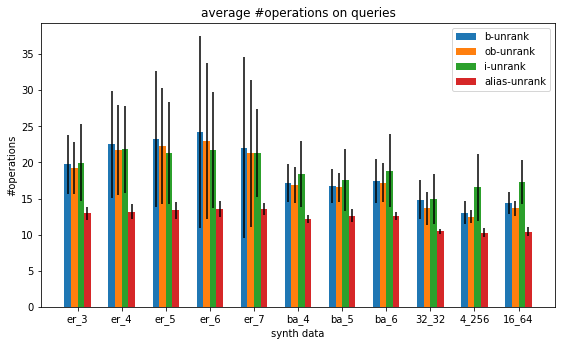

In [35]:
data = {name(i):  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries.pdf")

In [36]:
# data = {i:  { e: calculate_mean_and_std(d[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "synth data", "#operations", "average #operations on queries", "queries2.pdf")

In [39]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
l += [ ("gr", e) for e in list_grid ]

In [40]:
#launch bars on pre-computations
import subprocess
algos = ["b-unrank", "ob-unrank", "i-unrank", "alias-unrank"]
d_pre = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    i = x[1]
    for alg in algos:
        file =  x[0] +  "_" + str(nb_nodes) + "_" + repr(i) + "_" + alg + "/pre_time.csv"
        ll = read_integers_from_file(folder_path+"/"+file)
        d_pre[x][alg] = ll

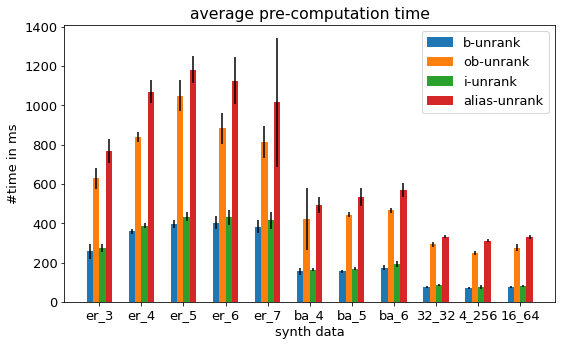

In [41]:
data = {name(i):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "#time in ms", "average pre-computation time", "pre_comp.pdf")

In [160]:
# data = {i[0]+"_"+repr(i[1]):  { e: calculate_mean_and_std(d_pre[i][e])   for e in algos }  for i in l if i[0]!="gr"}
# plot_bar_chart(data, "er, p = (xlog(n)/n)", "#time in ms", "average pre-computation time", "pre_comp2.pdf")

In [3]:
def construct_dag(l):
    g = nx.DiGraph()
    for e in l:
        for i in range(1,len(e)):
            if (e[i-1],e[i]) not in g.edges:
                g.add_edge(e[i-1],e[i])
    return g
def connected_gnp(n,p, max_tries = 10, directed = False):
    i = 0
    while i < max_tries:
        g = nx.fast_gnp_random_graph(N, p, directed=directed)
        if nx.is_connected(g):
            return g
        i += 1
    return None

def random_pairs_more_sh(g, V, max_tries = 10):
    i = 0
    while i < max_tries:
        lV = list(V)
        pair = random.sample(lV, k = 2)
        l = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=pair[0], target=pair[1])))
        if len(l) > 1:
            return l, pair
        i += 1
    return None


from math import prod
def prob_URW(dag, w):
    return prod( 1/dag.in_degree(w[i])  for i in range(1,len(w)))
def dist_URW(dag, l):
    return list(map( lambda x : prob_URW(dag, x), l ))

def random_weights(g,s,t):
    h = g.copy()
    n = len(g.nodes())
    for e in h.edges():
        h[e[0]][e[1]]['weight'] = 1 + random.uniform(-1/n,1/n)
    return nx.dijkstra_path(h, s, t, weight='weight')

def stat_random_weights(g,s,t,l, nb = 100):
    d = dict()
    for _ in range(nb):
        e = random_weights(g,s,t)
        te = tuple(e)
        if te in d:
            d[te] += 1
        else:
            d[te] = 1
    res = []
    for e in l:
        if e in d:
            res.append(d[e]/nb)
        else:
            res.append(0)
    return res
    

In [10]:
import networkx as nx

In [15]:
l = [("er", i) for i in range(start, nb_graphs_er+start)]
l += [("ba", i) for i in range(start_ba, nb_graphs_ba+start_ba)]
# l += [ ("gr", e) for e in list_grid ]

In [26]:
from scipy.stats import wasserstein_distance
#launch simulations on biased algos
pair_dist = "average"
nb_pairs = 10
import subprocess
algos = ["random_weights", "URW"]
d_was = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    print(x)
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    V = list(g.nodes())
    ll = random_pairs(nb_pairs, g)
    if ll == -1:
        print("problem pair sampling")
        break
    for e in ll:
        for alg in algos: 
            file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + "b-unrank" + "/"+ e[0] + ".edges"
            dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
            sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=e[0], target=e[1])))
            print("nb shortest", len(sl))
            if alg == "random_weights":
                res = stat_random_weights(g,e[0],e[1],sl, nb = len(sl)*10)
            else:
                res = dist_URW(dag, sl )
            res_unif = [ 1/len(sl) for e in sl ]
            wr = wasserstein_distance(res_unif, res)
            print(alg, wr)
            d_was[x][alg].append(wr)
            

('er', 3)
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 9
random_weights 0.03209876543209877
nb shortest 9
URW 0.02160493827160494
nb shortest 2
random_weights 0.09999999999999998
nb shortest 2
URW 0.0
nb shortest 3
random_weights 0.02222222222222222
nb shortest 3
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 5
random_weights 0.08
nb shortest 5
URW 0.06
nb shortest 6
random_weights 0.03888888888888889
nb shortest 6
URW 0.0
nb shortest 6
random_weights 0.03333333333333333
nb shortest 6
URW 0.0
nb shortest 3
random_weights 0.1111111111111111
nb shortest 3
URW 0.0
nb shortest 15
random_weights 0.01688888888888889
nb shortest 15
URW 0.026666666666666665
('er', 4)
nb shortest 2
random_weights 0.0
nb shortest 2
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 1
random_weights 0.0
nb shortest 1
URW 0.0
nb shortest 31
random_weights 0.006659729448491154
nb shortest

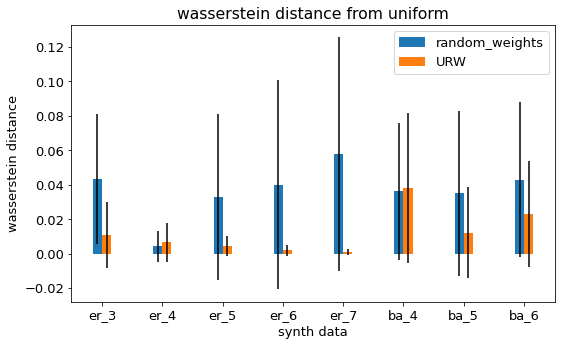

In [30]:
data = {name(i):  { e: calculate_mean_and_std(d_was[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)

In [38]:
from scipy.stats import wasserstein_distance
#launch simulations on biased algos with more than one sp
pair_dist = "average"
nb_pairs = 30
import subprocess
algos = ["random_weights", "URW"]
d_was_1 = { i: {alg:[]   for alg in algos}  for i in l }
for x in l:
    print(x)
    i = x[1]
    file_path = folder_path + "/" + x[0] + "_" + str(nb_nodes) + "_" + repr(i) + ".edges"
    g = nx.read_edgelist(file_path, create_using=nx.Graph, data=False)
    nb_effective = 0
    while nb_effective < nb_pairs:    
        ll = random_pairs(1, g)
        if ll == -1:
            print("problem pair sampling")
            break
        e = ll[0]
        file =  x[0]+ "_" + str(nb_nodes) + "_" + repr(i) + "_" + "b-unrank" + "/"+ e[0] + ".edges"
        dag = nx.read_edgelist(folder_path + "/" + file, create_using=nx.DiGraph, data=False)
        sl = list(map(lambda x:tuple(x), nx.all_shortest_paths(g, source=e[0], target=e[1])))
        print("nb shortest", len(sl))
        if len(sl) != 1:
            nb_effective += 1
        else:
            continue
        for alg in algos:
            print("entered")
            if alg == "random_weights":
                res = stat_random_weights(g,e[0],e[1],sl, nb = len(sl)*10)
            else:
                res = dist_URW(dag, sl )
            res_unif = [ 1/len(sl) for e in sl ]
            wr = wasserstein_distance(res_unif, res)
            print(alg, wr)
            d_was_1[x][alg].append(wr)


('er', 3)
nb shortest 5
entered
random_weights 0.04
entered
URW 0.0
nb shortest 1
nb shortest 1
nb shortest 4
entered
random_weights 0.05000000000000001
entered
URW 0.0
nb shortest 5
entered
random_weights 0.04000000000000001
entered
URW 0.0
nb shortest 8
entered
random_weights 0.040625
entered
URW 0.02678571428571428
nb shortest 8
entered
random_weights 0.021875000000000002
entered
URW 0.05625
nb shortest 7
entered
random_weights 0.0326530612244898
entered
URW 0.0
nb shortest 2
entered
random_weights 0.05000000000000002
entered
URW 0.0
nb shortest 12
entered
random_weights 0.015277777777777779
entered
URW 0.022222222222222227
nb shortest 3
entered
random_weights 0.11111111111111113
entered
URW 0.0
nb shortest 3
entered
random_weights 0.06666666666666668
entered
URW 0.0
nb shortest 1
nb shortest 5
entered
random_weights 0.024
entered
URW 0.0
nb shortest 14
entered
random_weights 0.017346938775510204
entered
URW 0.022263450834879406
nb shortest 7
entered
random_weights 0.036734693877551

random_weights 0.09999999999999998
entered
URW 0.0
nb shortest 3
entered
random_weights 0.02222222222222222
entered
URW 0.0
nb shortest 2
entered
random_weights 0.15000000000000002
entered
URW 0.0
nb shortest 1
nb shortest 3
entered
random_weights 0.04444444444444444
entered
URW 0.0
nb shortest 73
entered
random_weights 0.003377744417339089
entered
URW 0.004774712787473155
nb shortest 4
entered
random_weights 0.0375
entered
URW 0.0
nb shortest 2
entered
random_weights 0.05000000000000002
entered
URW 0.0
nb shortest 2
entered
random_weights 0.19999999999999998
entered
URW 0.0
nb shortest 3
entered
random_weights 0.02222222222222222
entered
URW 0.0
nb shortest 1
nb shortest 4
entered
random_weights 0.024999999999999994
entered
URW 0.0
nb shortest 3
entered
random_weights 0.06666666666666668
entered
URW 0.0
nb shortest 1
nb shortest 4
entered
random_weights 0.04999999999999999
entered
URW 0.0
nb shortest 1
nb shortest 5
entered
random_weights 0.056
entered
URW 0.0
nb shortest 3
entered
ra

random_weights 0.044444444444444446
entered
URW 0.055555555555555546
nb shortest 3
entered
random_weights 0.1111111111111111
entered
URW 0.0
nb shortest 2
entered
random_weights 0.15000000000000002
entered
URW 0.0
nb shortest 6
entered
random_weights 0.03333333333333333
entered
URW 0.04444444444444445
nb shortest 2
entered
random_weights 0.0
entered
URW 0.0
nb shortest 1
nb shortest 2
entered
random_weights 0.05000000000000002
entered
URW 0.0
nb shortest 6
entered
random_weights 0.05
entered
URW 0.05555555555555555
nb shortest 30
entered
random_weights 0.010888888888888889
entered
URW 0.01888888888888889
nb shortest 5
entered
random_weights 0.032
entered
URW 0.06
nb shortest 1
nb shortest 4
entered
random_weights 0.07500000000000001
entered
URW 0.08333333333333333
nb shortest 1
nb shortest 4
entered
random_weights 0.0625
entered
URW 0.08333333333333333
nb shortest 1
nb shortest 20
entered
random_weights 0.0175
entered
URW 0.023333333333333334
nb shortest 2
entered
random_weights 0.0999

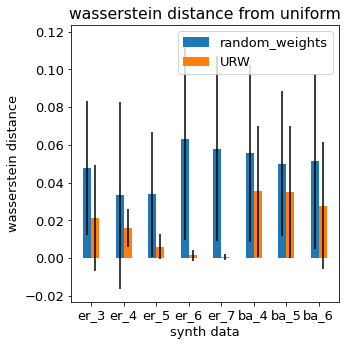

In [39]:
data = {name(i):  { e: calculate_mean_and_std(d_was_1[i][e])   for e in algos }  for i in l}
plot_bar_chart(data, "synth data", "wasserstein distance", "wasserstein distance from uniform", "biase_more_one.pdf", dim1 = 5, dim2 = 5, bar_w = 0.25)